# Early Stopping Test

[1] Prechelt, Lutz "Early Stopping - but when?", https://pdfs.semanticscholar.org/ea66/75caf8cdb9902e7889c0d75e8acc1c844b3d.pdf 

### Setup

In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function

In [2]:
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


In [22]:
from mlp.layers import AffineLayer, ReluLayer, ELULayer
from mlp.errors import CrossEntropyLogSoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.optimisers import Optimiser, EarlyStoppingOptimiser
from mlp.learning_rules import GradientDescentLearningRule

#setup hyperparameters
learning_rate = 0.01
num_epochs = 60 # TODO: CHANGED HERE FOR TESTING ONLY!
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 200

In [29]:
# Create a single function to test a simple MLP with RELULayer:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(model,
                               error,
                               learning_rule,
                               train_data,
                               valid_data,
                               test_data,
                               num_epochs,
                               stats_interval,
                               notebook=True):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors = {'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        data_monitors,
        notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(
        num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')

    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [26]:
func = ReluLayer()
i=6

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=47)
) 7 layers


Epoch 1: 5.7s to complete
    error(train)=2.83e+00, acc(train)=2.04e-01, error(valid)=2.82e+00, acc(valid)=2.01e-01, error(test)=2.85e+00, acc(test)=1.99e-01
Epoch 2: 5.5s to complete
    error(train)=1.22e+00, acc(train)=6.41e-01, error(valid)=1.23e+00, acc(valid)=6.37e-01, error(test)=1.25e+00, acc(test)=6.27e-01
Epoch 3: 5.6s to complete
    error(train)=9.81e-01, acc(train)=6.96e-01, error(valid)=1.00e+00, acc(valid)=6.89e-01, error(test)=1.02e+00, acc(test)=6.81e-01
Epoch 4: 5.7s to complete
    error(train)=7.88e-01, acc(train)=7.55e-01, error(valid)=8.16e-01, acc(valid)=7.46e-01, error(test)=8.41e-01, acc(test)=7.35e-01
Epoch 5: 5.7s to complete
    error(train)=7.21e-01, acc(train)=7.73e-01, error(valid)=7.63e-01, acc(valid)=7.65e-01, error(test)=7.87e-01, acc(test)=7.53e-01
Epoch 6: 5.7s to complete
    error(train)=6.44e-01, acc(train)=7.96e-01, error(valid)=6.97e-01, acc(valid)=7.81e-01, error(test)=7.19e-01, acc(test)=7.69e-01
Epoch 7: 5.7s to complete
    error(train)=5.9

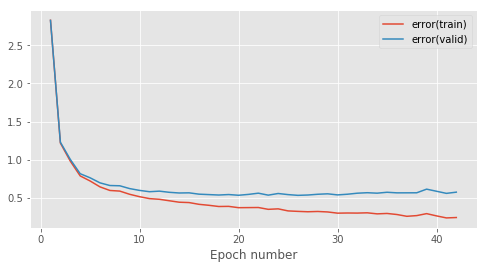

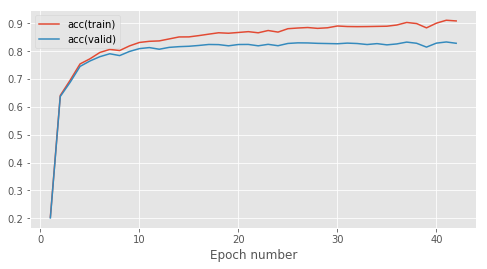

In [28]:
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
]
output_layer = [
    func,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    func,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=47)
) 7 layers


Epoch 1: 5.8s to complete
    error(train)=3.55e+00, acc(train)=1.22e-01, error(valid)=3.55e+00, acc(valid)=1.16e-01, error(test)=3.56e+00, acc(test)=1.18e-01
Epoch 2: 5.5s to complete
    error(train)=1.25e+00, acc(train)=6.37e-01, error(valid)=1.26e+00, acc(valid)=6.36e-01, error(test)=1.28e+00, acc(test)=6.29e-01
Epoch 3: 5.6s to complete
    error(train)=9.30e-01, acc(train)=7.19e-01, error(valid)=9.47e-01, acc(valid)=7.12e-01, error(test)=9.75e-01, acc(test)=7.05e-01
Epoch 4: 5.7s to complete
    error(train)=7.77e-01, acc(train)=7.61e-01, error(valid)=8.08e-01, acc(valid)=7.52e-01, error(test)=8.32e-01, acc(test)=7.44e-01
Epoch 5: 5.7s to complete
    error(train)=7.09e-01, acc(train)=7.75e-01, error(valid)=7.49e-01, acc(valid)=7.62e-01, error(test)=7.77e-01, acc(test)=7.56e-01
Epoch 6: 5.7s to complete
    error(train)=6.40e-01, acc(train)=7.96e-01, error(valid)=6.88e-01, acc(valid)=7.81e-01, error(test)=7.22e-01, acc(test)=7.71e-01
Epoch 7: 5.8s to complete
    error(train)=5.8

Epoch 53: 5.9s to complete
    error(train)=2.02e-01, acc(train)=9.21e-01, error(valid)=6.34e-01, acc(valid)=8.28e-01, error(test)=6.91e-01, acc(test)=8.22e-01
Epoch 54: 5.9s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=6.37e-01, acc(valid)=8.29e-01, error(test)=6.87e-01, acc(test)=8.21e-01
Epoch 55: 5.9s to complete
    error(train)=1.92e-01, acc(train)=9.25e-01, error(valid)=6.35e-01, acc(valid)=8.30e-01, error(test)=6.96e-01, acc(test)=8.19e-01
Epoch 56: 5.9s to complete
    error(train)=1.79e-01, acc(train)=9.31e-01, error(valid)=6.32e-01, acc(valid)=8.31e-01, error(test)=6.96e-01, acc(test)=8.25e-01
Epoch 57: 5.9s to complete
    error(train)=1.92e-01, acc(train)=9.25e-01, error(valid)=6.59e-01, acc(valid)=8.30e-01, error(test)=7.19e-01, acc(test)=8.17e-01
Epoch 58: 5.9s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=6.59e-01, acc(valid)=8.27e-01, error(test)=7.22e-01, acc(test)=8.16e-01
Epoch 59: 5.9s to complete
    error(tra

NameError: name 'expt' is not defined

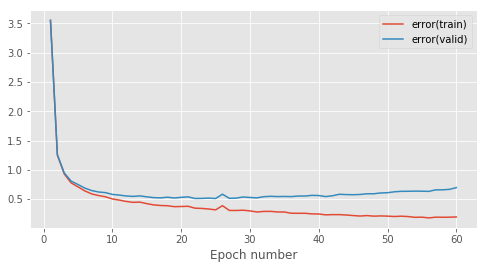

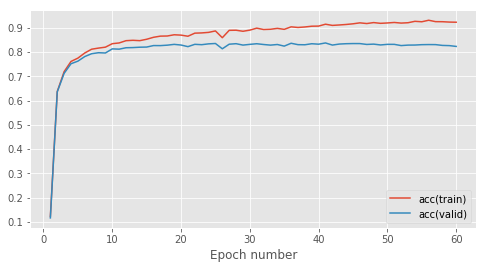

In [30]:
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
]
output_layer = [
    func,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    func,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

expt['SGD'] = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)